# Machine Learning Master Notes 15 - Regularization with SciKit Learn

### Prepare Environment

In [1]:
%matplotlib inline

# Essential libraries
import numpy as np
import pandas as pd

# Helper Function
import math
import random
import datetime
from datetime import datetime

# Graphical component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

# SciKit Learn Data Splitting and Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# SciKit Learn Pre-processing and Feature Scaling
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# SciKit Learn Regression Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV1 as my
import testFile as test


### Prepare Data

In [2]:
df = pd.read_csv('./data/housing_one_var.csv')
x1 = df['sqft'].to_frame()
y1 = df['price'].to_frame()

In [3]:
df2 = pd.read_csv('./data/housing_two_var.txt')
y2 = df2['price'].to_frame()
X2 = df2[['sqft','rm']]

In [4]:
df3 = pd.read_csv('./data/housing_four_var.txt')
y3_train = df3['price']
X3_train = df3[['sqft', 'rooms', 'floor', 'age']]

## Addressing Overfitting Problem

To address overfitting the solution are as below:
    
- **Collect more data**
- **Another method is to use less features by reducing the number of features especially polynomial features. If our model still overfit, then we may consider reducing the number of features we have. We can choose only few of the most relevant features.**
- **The third method is to use <u>Regularization</u>. This is a technique that will reduce the weights of features/parameters so that it is too small (such as 0.00001) to be significantly meaningful while we can still keep these features.**



## Addressing Underfitting Problem

To address underfitting the solution are as below:

- **We need to redo feature selection and select the features that are most relevant to the outcome.**
- **We can also increase the complexity of the features by performing feature engineering and increase its polynomial complexity.** 
- **Collect more data**
- **Select model that are capable of detecting complex relationship.**
- **Increase the number of iterations and use learning curve to check for convergence.**
- **We might need to tune back regularization a bit if such technique has been applied too aggressively.**

## Implementing Gradient Descent with Regularization Summary

Based on the cost function above, we can modified the gradient descent using the formula below:

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$

**Cost Function with Regularization:**	
$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$ 
$$$$

**Cost Function Regularization Term:**
$$\frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
$$$$
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives with **NO** regularization: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Implementation of Gradient Descent with **NO** regularization:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$


<font color='blue'>
    
**Full Implementation of Gradient Descent with Regularization:**
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w}  -  \alpha \left( \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  + \frac{\lambda}{m} \vec{w} \right) \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

$$$$
<font color='blue'>
**Gradient Descent Regularization Term:** $$\frac {\lambda}{m} \vec{w}$$
</font>

## Regression Function with Regularization

In [5]:
# Cost Function
def cost_function_regu_beta(X,y,coefficient,intercept,reguLambda=0):
    '''
    Actual cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    intercept (b) = scalar
    coefficient (w) = n by 1 vector, where n is total number of features
    reguLambda = default is 0, no regularization, please enter appropriate lambda value for regularization

    Return:
    Cost (scalar)
    '''

    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    m = X.shape[0]

    # Compute Normal Cost Function
    fx = (X@coefficient) + intercept
    lossFunction = (fx - y) ** 2
    RSS = lossFunction.sum()
    cost = (1 / (2 * m)) * RSS

    # Compute Regularization Term
    # lambda/2m * sum(w^2)
    regu = (reguLambda/ (2*m)) * sum(coefficient ** 2)

    totalCost = cost + regu[0]
    
    return totalCost

In [6]:
# Compute Gradient
def compute_gradient_regu_beta(X,y, coefficient, intercept=0., reguLambda=0.):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    w = n by 1 vector, where n is total number of features
    b = scalar (default = 0)
    reguLambda = scalar (default = 0), no regularization if default. Please enter appropriate lambda value for regularization.

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    # total number of features and training examples
    m,n = X.shape

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Matrix computation
    fx = ((X@coefficient) + intercept)
    temp_dw = (fx - y) * X
    temp_db = (fx - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape([n,1]) 

    # Compute Regularization Term
    regu = coefficient * (reguLambda/m) 

    dwRegu = dw + regu

    return db, dwRegu

In [7]:
def compute_gradient_descent_regu_beta(X, y, iterations=10000, init_b=0., init_w = None, alpha=0.01, reguLambda = 0., printProgress=False, 
                                       printProgressRate = 1000, storeHistory=False):
    '''
    Runs Gradient Descent

    Compulsory Input
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    
    Optional Input with Defauls
    iterations = total number of runs for the gradient descent (default: 10,000)
    init_b = initial b value (type: scalar) (default:0.)
    init_w = initial w value (type: n by 1 vector, where n is total number of features) (default:0.)
    alpha = learning rate / step size (default:0.01)

    Print Progress Options
    printProgress = To print the details while running gradient descent (type:Boolean) (default: False)
    printProgressRate = To print the details every n iterations (default:1000)

    Return:
    w = best w (n by 1 vector, where n is total number of features)
    b = best b (scalar)
    cost_history = Computed cost for each iterations (list)
    w_history = Computed w for each iterations (list)
    b_history = Computed g for each iterations (list)
    '''

    #### The following check for different data types and convert them to Numpy
    #### Also convert Pandas Series and DataFrame to Numpy
    #### Also convert 1D array to Numpy
    
    ### the following check if data type is Series
    if isinstance(X, pd.Series):
        #print('convert to numpy')
        X = X.to_frame()
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    ### the following check if data type is dataframe
    if isinstance(X, pd.DataFrame):
        #print('convert to numpy')
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(len(X),1)
    if y.ndim == 1:
        y = y.reshape(len(y),1)


    ### Check for init_w separately as the dimension of w depends on X
    ### Also perform copy to avoid changing the original array

    if np.any(init_w) == None:
        init_w = np.zeros([X.shape[1],1])

    if isinstance(init_w, pd.Series):
        init_w = init_w.copy().to_frame()

    if isinstance(init_w, pd.DataFrame):
        init_w = init_w.copy().to_numpy()

    if init_w.ndim == 1:
        init_w = init_w.copy()
        init_w = init_w.reshape(len(init_w),1)

    
    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if init_w.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w !')
        print(init_w.shape)
        print(X.shape[1])
        return

    # Initialization of variables
    m,n = X.shape
    
    db = 0
    dw = 0

    b = init_b
    w = init_w
    
    cost_history = []
    w_history = np.zeros((1,n))
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = compute_gradient_regu_beta(X,y,w,b,reguLambda)

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function_regu_beta(X,y,w,b,reguLambda)

        # Reshape w for printing and storing history
        w_convert = w.copy()
        w_convert = np.transpose(w_convert)
        
        if storeHistory == True: 
            cost_history.append(cost)
            b_history.append(b)
            w_history = np.vstack((w_history,w_convert))

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert.flatten()}")

    print(f"iteration {j}: Last cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert.flatten()}")
    print('best w', np.round(w.flatten(),4))
    print('best b', np.round(b,4)) 

    return w, b, cost_history, w_history[1:], b_history

## Objective of Regularization

As mentioned earlier, we want the machine learning model trend line to fit the data well but not too well. This is for us to use the coefficient to predict new query not in the training data.

## SciKit Learn Regularization Model

In SciKit Learn, some machine learning model had incorporated regularization into the model. For example, LogisticsRegression() and SGDRegressor() has a default L2 norm penalty, which is another term for regularization. However, LinearRegression() do not have regularization terms. 

In SciKit Learn, it uses **Lasso Regression (a.k.a L1 Regularization)** for regularization that uses **L1 norm** penalty. SciKit learn also use **Ridge Regression (a.k.a. L2 Regularization)** for regularization that uses **L2 norm** penalty. L1 and L2 penalty term are listed as below:

<font color='red'> 

**L1 Penalty Term in SciKit Learn:**
$$\alpha \sum\limits_{j=1}^{n} ||w_{j}||$$
</font>

<font color='red'> 
    
**L2 Penalty Term in SciKit Learn:**
$$\alpha \sum\limits_{j=1}^{n} w^{2}_{j}$$
</font>


Ridge Regression Generic Formula:

$$\hat{\beta} = argmin \left(\sum\limits_{m=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 + \lambda \sum\limits_{j=1}^{n} w^{2}_{j}\right)$$

Lasso Regression Generic Formula:

$$\hat{\beta} = argmin \left(\sum\limits_{m=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 + \lambda \sum\limits_{j=1}^{n} ||w_{j}||\right)$$

These terms are added to the main formula for regularization.


In SciKit learn, use `LinearRegression()` if we do not want to have any regularization. Use `Ridge()` for L2 regularization and use `Lasso()` for L1 regularization

<div class="alert alert-block alert-warning">

**Important**

L1 and L2 norm are use in mathematics to describe the magnitude of the vectors

**L1 Norm:**
$$||w||_1 = \sum\limits_{j=1}^{n} |w_{j}|$$
    
**L2 Norm:**
$$||w||_2 = \sqrt{\sum\limits_{j=1}^{n} w^{2}_{j}}$$

**This is not to be confuse with the term normalization in feature scaling**

</div>

<div class="alert alert-block alert-warning">


**Important**

The generic formula for Ridge Regression is as follows:

$$\hat{\beta} = argmin \left(\sum\limits_{m=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 + \lambda \sum\limits_{j=1}^{n} w^{2}_{j}\right)$$

The penalty term use in SciKit Learn is 
$$\alpha \sum\limits_{j=1}^{n} w^{2}_{j}$$

**The $\lambda$ and $\alpha$ refers to the same control parameters.**

**In Ridge and Lasso Regression, we use alpha in SciKit Learn to control the lambda.**

</div>

To use Lasso and Ridge Regression, the implementation method is the same as `LinearRegression()`

Importing modules:

- `from sklearn.linear_model import Ridge`
- `from sklearn.linear_model import Lasso`


Using Ridge Regression:

- Use `rg = Ridge(alpha = 10, fit_intercept=False)`
- Use `rg.fit(X_train, y_train)`
- Use `rg.predict` for prediction
- Use `rg.coef_` for coefficient
- Use `rg.intercept_` for intercept


Using Lasso Regression:

- Use `las = Lasso(alpha = 0.8, fit_intercept=False)`
- Use `las.fit(X_train, y_train)`
- Use `las.predict` for prediction
- Use `las.coef_` for coefficient
- Use `las.intercept_` for intercept

- https://medium.com/coinmonks/regularization-of-linear-models-with-sklearn-f88633a93a2
- https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

## Using Pipeline in SciKit Learn

Assuming we want to perform a linear regression on housing data using SciKit Learn, the steps will be as follows:

In [8]:
X_train = x1
y_train = y1

In [9]:
degree = 4

polynomial_features = PolynomialFeatures(degree=degree, include_bias = False)
X_train_poly = polynomial_features.fit_transform(X_train)

std_scaler = StandardScaler()
X_train_poly_norm = std_scaler.fit_transform(X_train_poly)

lr = LinearRegression()
lr.fit(X_train_poly_norm, y_train)

LinearRegression()

We can improve the process by using pipeline in SciKit Learn. The Pipeline module in SciKit Learn allow us to combined the polynomial features, feature scaling and regression model into a set of process.

First, we need to import the module using:

`from sklearn.pipeline import Pipeline`

Next, we can design the pipeline process. Please see an example below:

`stepsLinearRegression = [('poly', PolynomialFeatures(degree=degree)), ('scalar', StandardScaler()),('model', LinearRegression())]`

Then we can process the pipeline as follows:

- `myPipeline1 = Pipeline(stepsLinearRegression)`
- `myPipeline1.fit(X_train, y_train)`

The design of linear regreesion piple will be as follows:

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
degree = 4

stepsLinearRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
]

myLR_pipe = Pipeline(stepsLinearRegression)

myLR_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

Use the method `get_params()` to get the configurations of this pipeline.

In [12]:
myLR_pipe.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=4)),
  ('scaler', StandardScaler()),
  ('model', LinearRegression())],
 'verbose': False,
 'poly': PolynomialFeatures(degree=4),
 'scaler': StandardScaler(),
 'model': LinearRegression(),
 'poly__degree': 4,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

To access the methods and properties of steps, see the following examples:

In [13]:
myLR_pipe['poly'].get_feature_names_out()

array(['1', 'sqft', 'sqft^2', 'sqft^3', 'sqft^4'], dtype=object)

In [14]:
myLR_pipe['scaler'].mean_

array([1.00000000e+00, 2.00068085e+03, 4.62083843e+06, 1.23571030e+10,
       3.77866251e+13])

In [15]:
myLR_pipe['scaler'].scale_

array([1.00000000e+00, 7.86202619e+02, 4.05394589e+06, 1.79626658e+10,
       7.77920422e+13])

In [16]:
myLR_pipe['model'].coef_

array([[      0.        ,   43850.86073205,  -21632.10691931,
         311621.41243432, -235910.78423141]])

In [17]:
myLR_pipe['model'].intercept_

array([340412.65957447])

## Apply Housing Data Using SciKit Learn Regularization Model

### Using Housing Data with One Feature

In [18]:
X_train = x1
y_train = y1

In [19]:
linAsk = np.arange(1000, 5000, 100).reshape(-1,1)
linAsk= pd.DataFrame(linAsk, columns=['sqft'])

#### Linear Regression

In [20]:
degree = 40

stepsLinearRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
]

linearPipe = Pipeline(stepsLinearRegression)

linearPipe.fit(X_train, y_train)

y_pred = linearPipe.predict(X_train)

In [21]:
pline = np.c_[X_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

In [22]:
linAsk_pred = linearPipe.predict(linAsk)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

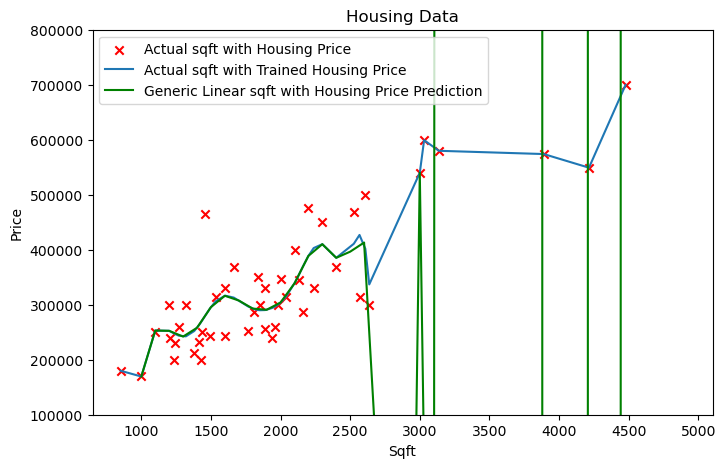

In [23]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_train['sqft'], y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

#### Ridge Regression

In [24]:
degree = 40
ridgeAlpha = 10
stepsRidgeRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=ridgeAlpha, fit_intercept=True))
]

ridgePipe = Pipeline(stepsRidgeRegression)

ridgePipe.fit(X_train, y_train)

y_pred = ridgePipe.predict(X_train)

In [25]:
pline = np.c_[X2['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

linAsk_pred = ridgePipe.predict(linAsk)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

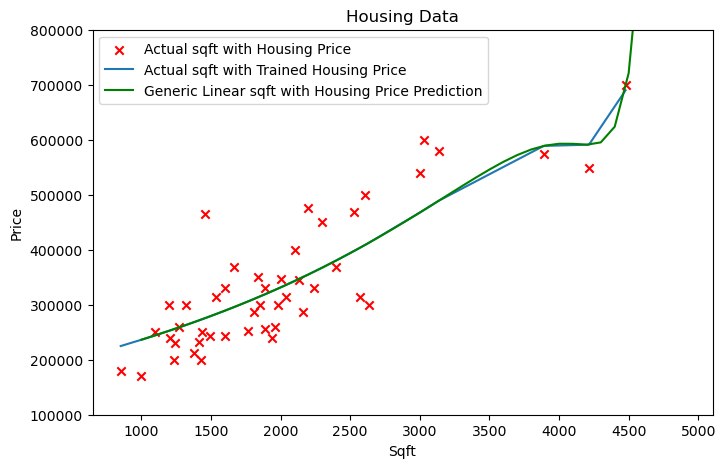

In [26]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_train['sqft'], y2, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

#### Lasso Regression

In [27]:
degree = 40
lassoAlpha = 10
stepsLassoRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=lassoAlpha, max_iter=1000000, fit_intercept=True))
]

lassoPipe = Pipeline(stepsLassoRegression)

lassoPipe.fit(X_train, y_train)

y_pred = lassoPipe.predict(X_train)

In [28]:
pline = np.c_[X2['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

linAsk_pred = ridgePipe.predict(linAsk)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

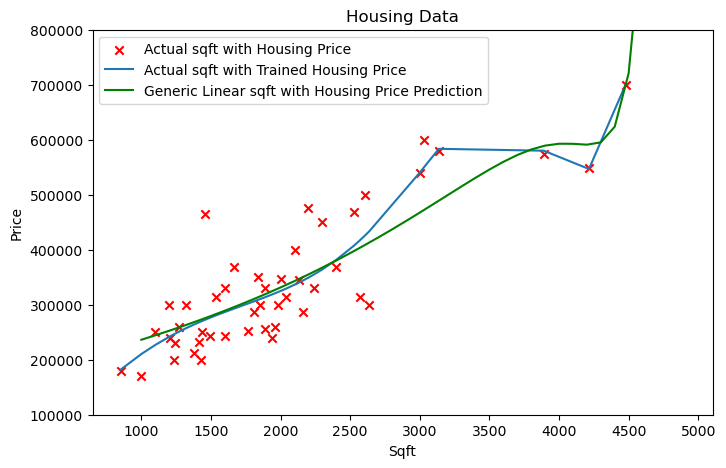

In [29]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_train['sqft'], y2, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

### Using Housing Data with Two Features

In [30]:
X2_train = X2
y2_train = y2

In [31]:
linAsk = np.arange(1000, 4500, 100).reshape(-1,1)
rooms = np.ones((linAsk.shape[0],1)) * 3
linAsk = np.c_[linAsk, rooms]
linAsk = pd.DataFrame(linAsk, columns=['sqft','rm'])

#### Linear Regression

In [32]:
degree = 40

stepsLinearRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
]

linearPipe = Pipeline(stepsLinearRegression)

linearPipe.fit(X2_train, y2_train)

y_pred = linearPipe.predict(X2_train)

In [33]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

In [34]:
linAsk_pred = linearPipe.predict(linAsk)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

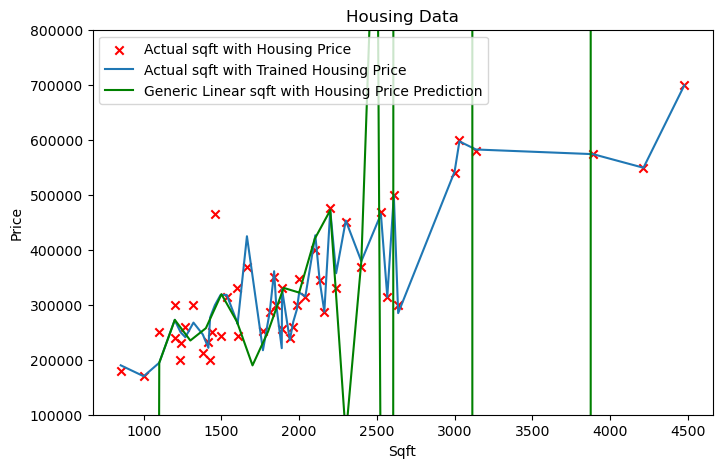

In [35]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_train['sqft'], y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

#### Ridge Regression

In [36]:
degree = 40
ridgeAlpha = 100
stepsRidgeRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=ridgeAlpha, fit_intercept=True))
]

ridgePipe = Pipeline(stepsRidgeRegression)

ridgePipe.fit(X2_train, y2_train)

y_pred = ridgePipe.predict(X2_train)

In [37]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

In [38]:
linAsk_pred = ridgePipe.predict(linAsk)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

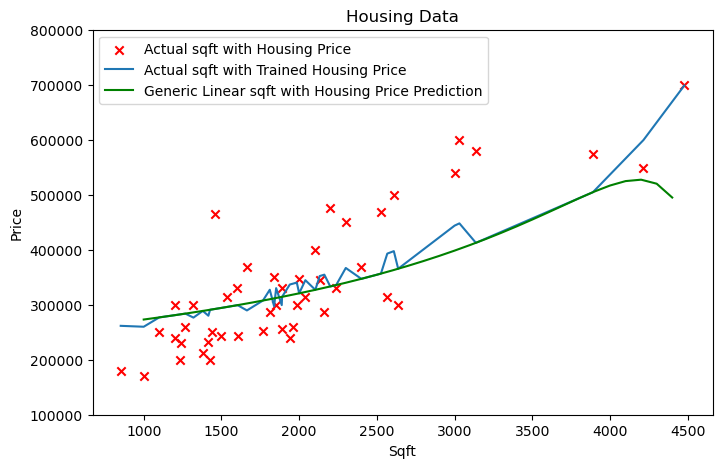

In [39]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_train['sqft'], y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

#### Lasso Regression

In [40]:
degree = 40
lassoAlpha = 100
stepsLassoRegression = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=lassoAlpha, max_iter=1000000, fit_intercept=True))
]

lassoPipe = Pipeline(stepsLassoRegression)

lassoPipe.fit(X2_train, y2_train)

y_pred = lassoPipe.predict(X2_train)

In [41]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

In [42]:
linAsk_pred = lassoPipe.predict(linAsk)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

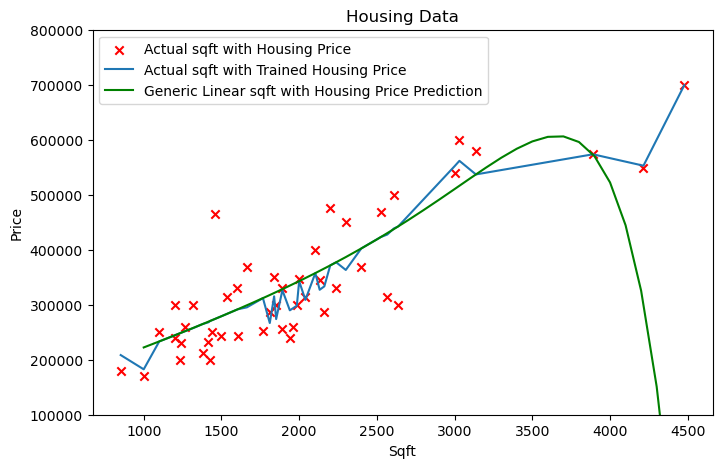

In [43]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_train['sqft'], y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

<div class="alert alert-block alert-info">

**Important**

For Lasso Regression the number of iterations default at 1000. This may not be enough for Lasso Regression to converge, you can increase the maximum iterations by using the parameters `max_iter=1000000`.

</div>

## Comparing Ridge vs Lasso Regression

In [44]:
X3_train.head()

,sqft,rooms,floor,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


In [45]:
y3_train.head()

0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: price, dtype: float64

### Linear Regression

In [46]:
degree = 1

stepsLinearRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
]

linearPipe = Pipeline(stepsLinearRegression)

linearPipe.fit(X3_train, y3_train)

y_pred = linearPipe.predict(X3_train)

In [47]:
linearPipe['poly'].get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age'], dtype=object)

In [48]:
pline = np.c_[X3_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

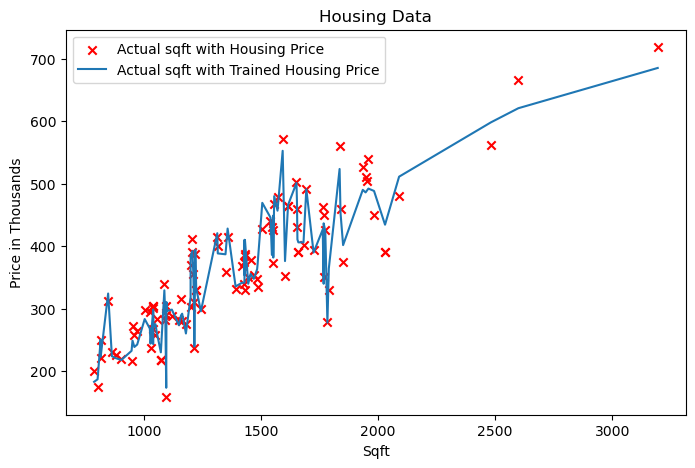

In [49]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train['sqft'], y3_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price in Thousands')
ax1.legend(loc="upper left")
plt.show()

### Ridge Regression

In [50]:
degree = 1
ridgeAlpha = 10
stepsRidgeRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=ridgeAlpha, fit_intercept=True))
]

ridgePipe = Pipeline(stepsRidgeRegression)

ridgePipe.fit(X3_train, y3_train)

y_pred = ridgePipe.predict(X3_train)

In [51]:
pline = np.c_[X3_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

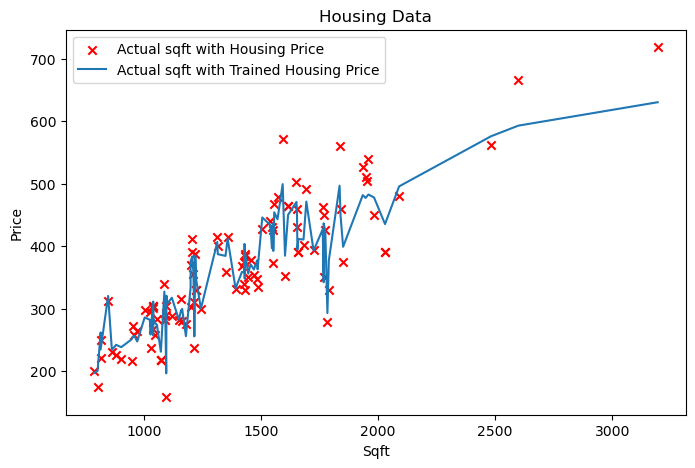

In [52]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train['sqft'], y3_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
#ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
#ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

In [53]:
ridgePipe['poly'].get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age'], dtype=object)

In [54]:
ridgePipe['model'].coef_

array([ 90.29929574, -13.05139922, -21.3164491 , -36.84120527])

#### Ridge Regression and Lambda

Let us try various range of alpha and see what happen to the weights.

In [55]:
degree = 1
weights = None
for alpha in range(0,10010,10):
    degree = 1
    ridgePipe['poly'].alpha = degree
    ridgePipe['model'].alpha = alpha
    ridgePipe.fit(X3_train, y3_train)
    coef = ridgePipe['model'].coef_
    coef = np.insert(coef,0,alpha)
    #print(coef)
    if weights is None: 
        weights = np.array(coef).reshape(1,-1)
    else:
        weights = np.vstack((weights, coef))

In [56]:
weights[:5]

array([[  0.        , 110.61335173, -21.47323884, -32.66070323,
        -37.77938362],
       [ 10.        ,  90.29929574, -13.05139922, -21.3164491 ,
        -36.84120527],
       [ 20.        ,  77.28254727,  -8.02381697, -14.34862218,
        -35.30504058],
       [ 30.        ,  68.12627748,  -4.74634515,  -9.70818685,
        -33.63669615],
       [ 40.        ,  61.27102305,  -2.48377913,  -6.44900024,
        -32.00072154]])

In [57]:
ridgePipe['poly'].get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age'], dtype=object)

In [58]:
weights = pd.DataFrame(weights, columns = ['alpha','sqft', 'rooms', 'floor', 'age'])
weights

,alpha,sqft,rooms,floor,age
0,0.0,110.613352,-21.473239,-32.660703,-37.779384
1,10.0,90.299296,-13.051399,-21.316449,-36.841205
2,20.0,77.282547,-8.023817,-14.348622,-35.305041
3,30.0,68.126277,-4.746345,-9.708187,-33.636696
4,40.0,61.271023,-2.483779,-6.449000,-32.000722
...,...,...,...,...,...
996,9960.0,0.881112,0.293656,0.323210,-0.592577
997,9970.0,0.880242,0.293371,0.322897,-0.591992
998,9980.0,0.879374,0.293086,0.322584,-0.591407
999,9990.0,0.878507,0.292802,0.322271,-0.590824


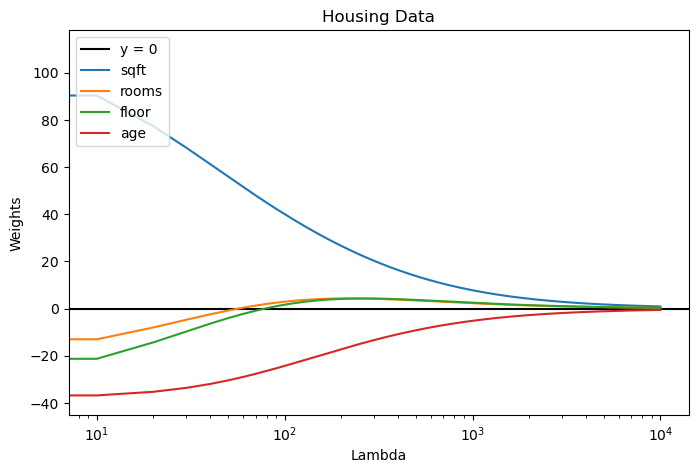

In [59]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in ['sqft', 'rooms', 'floor', 'age']:
    ax1.plot(weights['alpha'], weights[f], label=str(f))
ax1.set_title('Housing Data')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()

Base on the chart the weights will reduce to near zeros when alpha is very large. However, it will never set to zeros.

In [60]:
weights

,alpha,sqft,rooms,floor,age
0,0.0,110.613352,-21.473239,-32.660703,-37.779384
1,10.0,90.299296,-13.051399,-21.316449,-36.841205
2,20.0,77.282547,-8.023817,-14.348622,-35.305041
3,30.0,68.126277,-4.746345,-9.708187,-33.636696
4,40.0,61.271023,-2.483779,-6.449000,-32.000722
...,...,...,...,...,...
996,9960.0,0.881112,0.293656,0.323210,-0.592577
997,9970.0,0.880242,0.293371,0.322897,-0.591992
998,9980.0,0.879374,0.293086,0.322584,-0.591407
999,9990.0,0.878507,0.292802,0.322271,-0.590824


In [61]:
weights.iloc[0]

alpha      0.000000
sqft     110.613352
rooms    -21.473239
floor    -32.660703
age      -37.779384
Name: 0, dtype: float64

For the first data where alpha is 0, the weights are either in the positive or negative range.

In [62]:
weights.iloc[-1]

alpha    10000.000000
sqft         0.877642
rooms        0.292518
floor        0.321960
age         -0.590243
Name: 1000, dtype: float64

For the last data where alpha is 10000, the weights are near zeros but not exactly zero.

Ridge regression allows us to keep the features while retaining information from all the features.

### Lasso Regression

In [63]:
degree = 1
lassoAlpha = 10
stepsLassoRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=lassoAlpha, max_iter=10000, fit_intercept=True))
]

lassoPipe = Pipeline(stepsLassoRegression)

lassoPipe.fit(X3_train, y3_train)

y_pred = lassoPipe.predict(X3_train)

In [64]:
pline = np.c_[X3_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

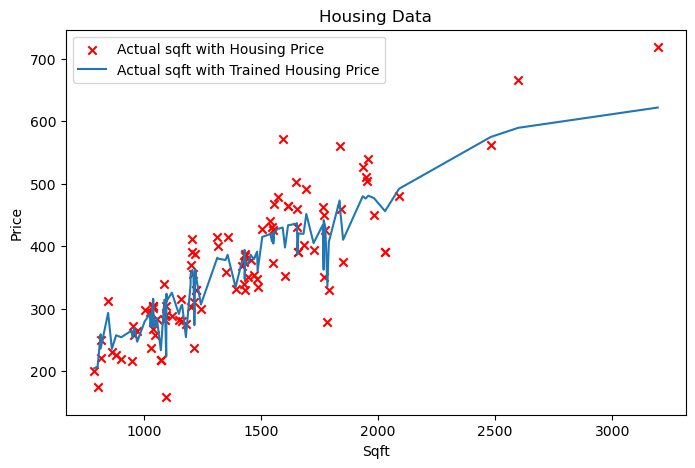

In [65]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train['sqft'], y3_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
#ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
#ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

In [66]:
lassoPipe['poly'].get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age'], dtype=object)

In [67]:
lassoPipe['model'].coef_

array([ 76.58407267,  -1.19892238,  -8.52957616, -31.0039131 ])

#### Lasso Regression and Lambda

Let us try various range of alpha and see what happen to the weights.

In [68]:
degree = 1
weightsLasso = None
for alpha in range(1,101,1):
    degree = 1
    lassoPipe['poly'].alpha = degree
    lassoPipe['model'].alpha = alpha
    lassoPipe['model'].max_iter=10000
    lassoPipe.fit(X3_train, y3_train)
    coef = lassoPipe['model'].coef_
    coef = np.insert(coef,0,alpha)
    #print(coef)
    if weightsLasso is None: 
        weightsLasso = np.array(coef).reshape(1,-1)
    else:
        weightsLasso = np.vstack((weightsLasso, coef))

In [69]:
weightsLasso[:5]

array([[  1.        , 107.20873147, -19.44607088, -30.24666322,
        -37.10212404],
       [  2.        , 103.80301847, -17.41910321, -27.83201662,
        -36.42505022],
       [  3.        , 100.40065025, -15.39158061, -25.41921157,
        -35.74740808],
       [  4.        ,  96.99828202, -13.364058  , -23.00640651,
        -35.06976594],
       [  5.        ,  93.5959138 , -11.3365354 , -20.59360145,
        -34.3921238 ]])

In [70]:
lassoPipe['poly'].get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age'], dtype=object)

In [71]:
weightsLasso = pd.DataFrame(weightsLasso, columns = ['alpha','sqft', 'rooms', 'floor', 'age'])
weightsLasso

,alpha,sqft,rooms,floor,age
0,1.0,107.208731,-19.446071,-30.246663,-37.102124
1,2.0,103.803018,-17.419103,-27.832017,-36.425050
2,3.0,100.400650,-15.391581,-25.419212,-35.747408
3,4.0,96.998282,-13.364058,-23.006407,-35.069766
4,5.0,93.595914,-11.336535,-20.593601,-34.392124
...,...,...,...,...,...
95,96.0,0.000000,0.000000,0.000000,-0.000000
96,97.0,0.000000,0.000000,0.000000,-0.000000
97,98.0,0.000000,0.000000,0.000000,-0.000000
98,99.0,0.000000,0.000000,0.000000,-0.000000


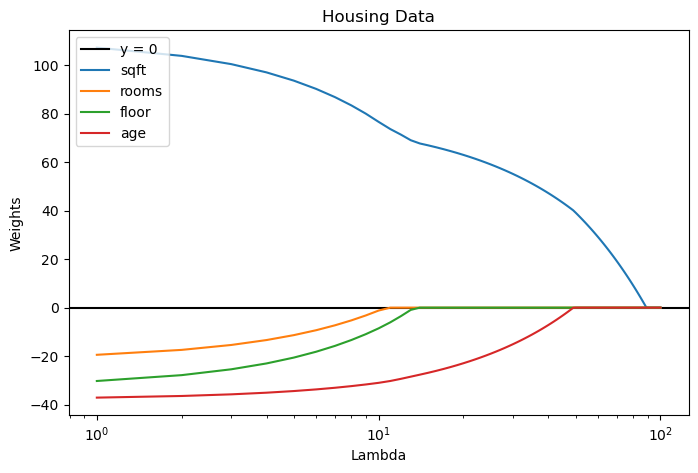

In [72]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in ['sqft', 'rooms', 'floor', 'age']:
    ax1.plot(weightsLasso['alpha'], weightsLasso[f], label=str(f))
ax1.set_title('Housing Data')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()

Based on the graph the features will be set to 0 as $\lambda$ increases. From the chart we can also see that those features that set to zeros first are the least significant features. From the chart we can conclude that sqft, follow by age of the house is the most prominent features.

In [73]:
weightsLasso.iloc[0]

alpha      1.000000
sqft     107.208731
rooms    -19.446071
floor    -30.246663
age      -37.102124
Name: 0, dtype: float64

In [74]:
weightsLasso.iloc[10]

alpha    11.000000
sqft     73.625775
rooms    -0.000000
floor    -6.052834
age     -30.240837
Name: 10, dtype: float64

In [75]:
weightsLasso.iloc[40]

alpha    41.000000
sqft     46.433762
rooms     0.000000
floor     0.000000
age      -6.382637
Name: 40, dtype: float64

In [76]:
weightsLasso.iloc[88]

alpha    89.000000
sqft      0.158801
rooms     0.000000
floor     0.000000
age      -0.000000
Name: 88, dtype: float64

In [77]:
## All features set to zeros
weightsLasso.iloc[89]

alpha    90.0
sqft      0.0
rooms     0.0
floor     0.0
age      -0.0
Name: 89, dtype: float64

From the chart and data above, we can see that each features drop to zero as alpha increase. The least influential features will drop to zero first. Lasso Regression is sometimes used as a tool for **feature selection**. Please also note that in situations where we have datasets that contains more than 2 highly correlated features, Lasso regression will tends to just pick one of the features and the rest of correlated features will be set to zero.

## Elastic Net

In SciKit Learn, there is another Regularization technique called Elastic Net. This regularization combines the regularization of Ridge Regression and Lasso Regression. In a dataset that have more than 2 features that are highly correlated, when using Lasso regression, it will selected only one of the correlated feature, and the rest of the correlated features will be set to zero. Elastic net aim to resolved this issue by introducing two regularization term both L1 penalty and L2 penalty.

The regularization term is as follows:

<font color='blue'>
    
$$\alpha \rho ||w_1|| + \frac{\alpha (1 - \rho)}{2} ||w_2||^2$$
$$ $$
where:
$$ $$
- $\alpha$ is the alpha ($\lambda$) control parameter
- $\rho$ is the L1 ratio.

We can adjust the ratio between L1 penalty and L2 penalty. When alpha is zero, elastic net will set to use ridge regression. When alpha is one, elastic net will set to use lasso regression. When alpha is between zero and one, elastic net will balance between ridge and lasso regression.

By adjusting both $\alpha$ and $\rho$, we can make sure that the model will pick up both correlated features while less significant features can be set to zeros.

<div class="alert alert-block alert-warning">

Please note that for SciKit Learn there are limitations in alpha and l1_ratio:
- alpha = 0 is equivalent to an LinearRegression()
- For numerical reasons, using alpha = 0 is not advised.

- l1_ratio <= 0.01 is not reliable
- The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty.
- For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

To use Elastic Net we need to import the module as follows:

- `from sklearn.linear_model import ElasticNet`
- `elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)`
- `elastic_net.fit(X_train, y_train)`


#### Reference

- https://scikit-learn.org/stable/modules/linear_model.html#elastic-net
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV
- https://hastie.su.domains/Papers/elasticnet.pdf

### Elastic Net

In [78]:
from sklearn.linear_model import ElasticNet

degree = 1
stepsElasticNet = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
]

enetPipe = Pipeline(stepsElasticNet)

enetPipe.fit(X3_train, y3_train)

y_pred = enetPipe.predict(X3_train)

In [79]:
pline = np.c_[X3_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

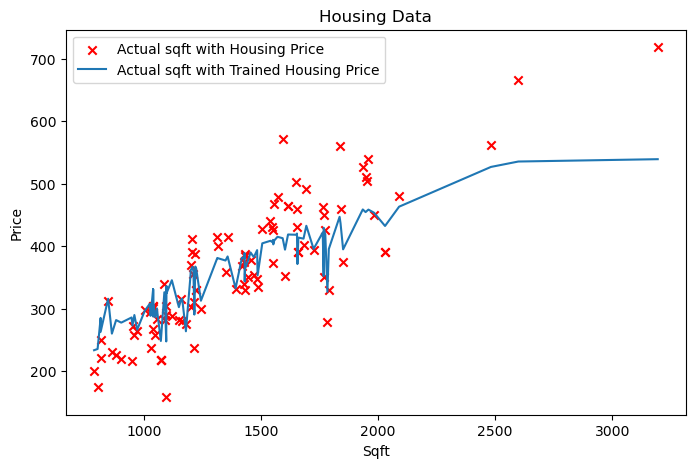

In [80]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train['sqft'], y3_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

In [81]:
enetPipe['model'].alpha

1.0

In [82]:
enetPipe['model'].l1_ratio

0.5

In [83]:
enetPipe['poly'].get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age'], dtype=object)

In [84]:
enetPipe['model'].coef_

array([ 55.2460595 ,  -0.39979622,  -3.55090635, -30.15476766])

### Elastic Net and Alpha

#### L1 Ratio = 0.5 (Deault)

Let us try various range of alpha and see what happen to the weights.

In [85]:
degree = 1
weightsEnet = None
l1_ratio = 0.5
for alpha in np.linspace(0.1,100.0,100):
    degree = 1
    enetPipe['poly'].alpha = degree
    enetPipe['model'].l1_ratio = l1_ratio
    enetPipe['model'].alpha = alpha
    enetPipe.fit(X3_train, y3_train)
    coef = enetPipe['model'].coef_
    coef = np.insert(coef, 0, alpha)
    coef = np.insert(coef, 1, l1_ratio)
    #print(coef)
    if weightsEnet is None: 
        weightsEnet = np.array(coef).reshape(1,-1)
    else:
        weightsEnet = np.vstack((weightsEnet, coef))

In [86]:
weightsEnet = pd.DataFrame(weightsEnet , columns = ['alpha','ratio','sqft', 'rooms', 'floor', 'age'])
weightsEnet 

,alpha,ratio,sqft,rooms,floor,age
0,0.100000,0.5,99.042406,-16.579025,-26.125499,-37.403115
1,1.109091,0.5,52.848251,-0.000000,-2.454184,-29.323060
2,2.118182,0.5,38.506415,2.735663,1.632949,-23.303503
3,3.127273,0.5,30.618632,3.587660,3.157923,-19.214289
4,4.136364,0.5,25.551602,3.752408,3.636695,-16.302318
...,...,...,...,...,...,...
95,95.963636,0.5,0.839338,0.000000,0.000000,-0.239354
96,96.972727,0.5,0.820653,0.000000,0.000000,-0.226820
97,97.981818,0.5,0.802344,0.000000,0.000000,-0.214537
98,98.990909,0.5,0.784400,0.000000,0.000000,-0.202497


In [87]:
enetPipe['model'].l1_ratio

0.5

In [88]:
weightsEnet.iloc[30]

alpha    30.372727
ratio     0.500000
sqft      4.466214
rooms     0.742035
floor     0.901124
age      -2.676141
Name: 30, dtype: float64

In [89]:
weightsEnet.iloc[60]

alpha    60.645455
ratio     0.500000
sqft      1.869361
rooms     0.000000
floor     0.052423
age      -0.928853
Name: 60, dtype: float64

In [90]:
weightsEnet.iloc[80]

alpha    80.827273
ratio     0.500000
sqft      1.174006
rooms     0.000000
floor     0.000000
age      -0.463657
Name: 80, dtype: float64

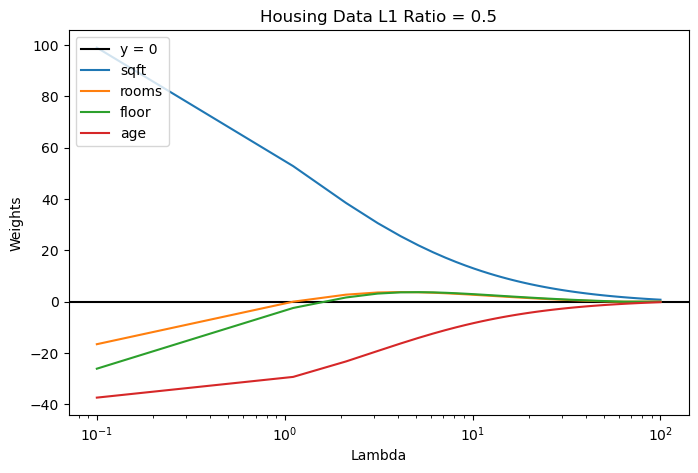

In [91]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in ['sqft', 'rooms', 'floor', 'age']:
    ax1.plot(weightsEnet['alpha'], weightsEnet[f], label=str(f))
ax1.set_title('Housing Data L1 Ratio = 0.5')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()

At `l1_ratio` of $0.5$, there are only 2 features left when $alpha = 100$.

#### L1 Ratio = 0.1

In [92]:
degree = 1
weightsEnet = None
ratio = 0.1
for alpha in np.linspace(0.1,100,100):
    degree = 1
    enetPipe['poly'].alpha = degree
    enetPipe['model'].alpha = alpha
    enetPipe['model'].l1_ratio = ratio
    enetPipe['model'].max_iter = 10000000
    enetPipe.fit(X3_train, y3_train)
    coef = enetPipe['model'].coef_
    coef = np.insert(coef, 0, alpha)
    coef = np.insert(coef, 1, ratio)
    #print(coef)
    if weightsEnet is None: 
        weightsEnet = np.array(coef).reshape(1,-1)
    else:
        weightsEnet = np.vstack((weightsEnet, coef))

In [93]:
weightsEnet = pd.DataFrame(weightsEnet , columns = ['alpha','ratio','sqft', 'rooms', 'floor', 'age'])
weightsEnet 

,alpha,ratio,sqft,rooms,floor,age
0,0.100000,0.1,91.894338,-13.684591,-22.185686,-36.966809
1,1.109091,0.1,40.002268,2.855467,1.585900,-24.287309
2,2.118182,0.1,27.336982,4.187702,3.958848,-17.652006
3,3.127273,0.1,21.044500,4.121438,4.187311,-13.857788
4,4.136364,0.1,17.179647,3.811667,3.981549,-11.405187
...,...,...,...,...,...,...
95,95.963636,0.1,0.905625,0.228414,0.262485,-0.572595
96,96.972727,0.1,0.895233,0.225007,0.258742,-0.565604
97,97.981818,0.1,0.885051,0.221668,0.255074,-0.558754
98,98.990909,0.1,0.875074,0.218395,0.251478,-0.552041


In [94]:
enetPipe['model'].l1_ratio

0.1

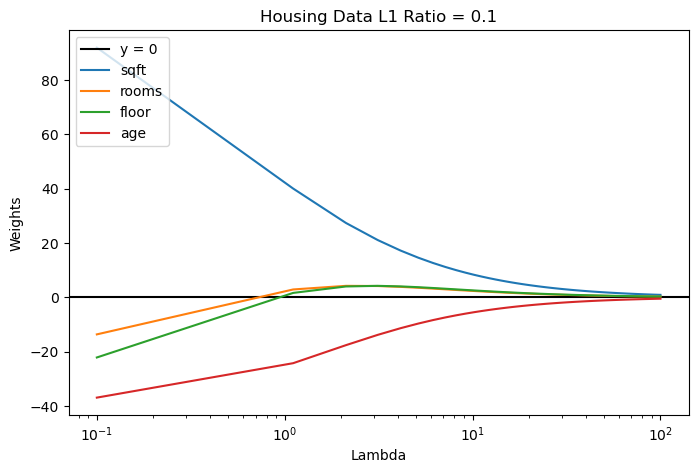

In [95]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in ['sqft', 'rooms', 'floor', 'age']:
    ax1.plot(weightsEnet['alpha'], weightsEnet[f], label=str(f))
ax1.set_title('Housing Data L1 Ratio = 0.1')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()

In [96]:
weightsEnet.iloc[-1]

alpha    100.000000
ratio      0.100000
sqft       0.865294
rooms      0.215185
floor      0.247952
age       -0.545462
Name: 99, dtype: float64

At `l1_ratio` of near zero of $0.1$, all features are still available but near zeros. This confirm that by setting **l1_ratio to near zeros**, it will **behave the same as Ridge Regression L2 penalty**.

#### L1 Ratio = 1

In [97]:
degree = 1
weightsEnet = None
ratio = 1
for alpha in np.linspace(0.1,100,100):
    degree = 1
    enetPipe['poly'].alpha = degree
    enetPipe['model'].alpha = alpha
    enetPipe['model'].l1_ratio = ratio
    enetPipe['model'].max_iter = 10000000
    enetPipe.fit(X3_train, y3_train)
    coef = enetPipe['model'].coef_
    coef = np.insert(coef, 0, alpha)
    coef = np.insert(coef, 1, ratio)
    #print(coef)
    if weightsEnet is None: 
        weightsEnet = np.array(coef).reshape(1,-1)
    else:
        weightsEnet = np.vstack((weightsEnet, coef))

In [98]:
weightsEnet = pd.DataFrame(weightsEnet , columns = ['alpha','ratio','sqft', 'rooms', 'floor', 'age'])
weightsEnet 

,alpha,ratio,sqft,rooms,floor,age
0,0.100000,1.0,110.271451,-21.270816,-32.418493,-37.711902
1,1.109091,1.0,106.837493,-19.224890,-29.983411,-37.028211
2,2.118182,1.0,103.400920,-17.179487,-27.546867,-36.344965
3,3.127273,1.0,99.967622,-15.133532,-25.112127,-35.661163
4,4.136364,1.0,96.534323,-13.087578,-22.677388,-34.977360
...,...,...,...,...,...,...
95,95.963636,1.0,0.000000,0.000000,0.000000,-0.000000
96,96.972727,1.0,0.000000,0.000000,0.000000,-0.000000
97,97.981818,1.0,0.000000,0.000000,0.000000,-0.000000
98,98.990909,1.0,0.000000,0.000000,0.000000,-0.000000


In [99]:
enetPipe['model'].l1_ratio

1

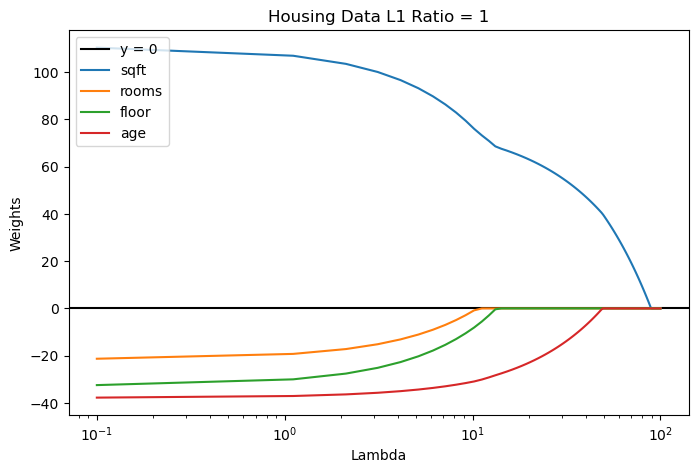

In [100]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in ['sqft', 'rooms', 'floor', 'age']:
    ax1.plot(weightsEnet['alpha'], weightsEnet[f], label=str(f))
ax1.set_title('Housing Data L1 Ratio = 1')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()

In [101]:
weightsEnet.iloc[-1]

alpha    100.0
ratio      1.0
sqft       0.0
rooms      0.0
floor      0.0
age       -0.0
Name: 99, dtype: float64

**At `l1_ratio` of $1.0$, all features are still set to zeros same as Lasso Regression.**

## Summary of Ridge Regression

### Major Characteristics of Ridge Regression

- Regularization term $\alpha \sum\limits_{j=1}^{n} w^{2}_{j}$ is added to the cost function and the function that computes gradient in order to reduce overfitting problem.
- The weights / coefficient will be reduce to address overfitting.
- When lambda (alpha in SciKit Learn) is high, the weights / coefficient reduce to near zeros.

### Pros of Ridge Regression

- Reduces overfitting.
- Ridges regression is able to handle multiple features that are highly correlated
- Able to handle large datasets well due to gradient descent characteristics.
- Able to keep all features.

### Cons of Ridge Regression

- Does not show the significance of multiple features.
- Need scaling to reduce impact of feature with large numbers.
- Do not perform feature selection and thus may keep features that are less significant.

## Summary of Lasso Regression

### Major Characteristics of Lasso Regression

- Regularization term $\alpha \sum\limits_{j=1}^{n} ||w_{j}||$ is added to the cost function and the function that computes gradient in order to reduce overfitting problem.
- The weights / coefficient will be reduce to address overfitting.
- When lambda (alpha in SciKit Learn) is high, the weights / coefficient will set to zeros. The most significant features will be the last to reach zero.
- For several highly correlated features only one of them will be retained and the rest will be set to zeros. 

### Pros of Lasso Regression

- Able to perform feature selection
- Can help to reduce features that are least important.
- Address overfitting problem.

### Cons of Lasso Regression

- Can ignored useful features if alpha is high.
- Need scaling to reduce impact of feature with large numbers.
- Not able to handle correlated features as some of the features will be set to zero.


## Summary of Elastic Net 

### Major Characteristics of Elastic Net

- Combined both regularization term $\alpha \sum\limits_{j=1}^{n} ||w_{j}||$  and $\alpha \sum\limits_{j=1}^{n} w^{2}_{j}$.
- The weights / coefficient will be reduce to address overfitting.
- Can have both qualities of Ridge and Lasso Regression by mixing the `l1_ratio` 

### Pros of Elastic Net

- Enjoy the benefits of both Ridge and Lasso Regression
- Able to perform feature selection and also retain features when required by mixing the `l1_ratio` 
- Address overfitting problem.

### Cons of Elastic Net

- Required tuning of additional parameters
- Need scaling to reduce impact of feature with large numbers.
- Not able to handle correlated features as good as Ridge Regression if the setting are more heavy on the `l1_ratio`.

## Using Ridge, Lasso and Elastic Net Regularization 

### Ridge Regression

- If we have many highly correlated features. This models helps us to stabilized the weights of these features.
- When we know that all our features are important and we do not wish to drop any features.
- If we want a stable model that is less sensitive to small changes in data.
- Ridge Regression works well if we have dataset that have many equally weighted features.
- An example will be using Ridge for predicting housing prices.

### Lasso Regression

- Use Lasso Regression if there are only a few of the features is important and we want to drop those unimportant features. Lasso Regression can also be used as a tools for feature selection.
- Solve highly correlated features when we only want one of the correlated features. 
- When we need a sparse model with only few significant features. 
- Use Lasso when our number of features is much more than our number of observations.
- An example is to use genetic data to predict disease. The genetic features is much more than number of patient data.

### Elastic Net

- When we want the benefits of both Lasso and Ridge Regression.
- When we want to simplified the number of features and at the same time keep all the significant but highly correlated features.
- When we want the flexibility of adjusting between Lasso and Ridge Regression. 

### Additional Reference

- https://towardsdatascience.com/when-to-use-lasso-regression-8a4c4b334fa8
- https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29
- https://medium.com/@creatrohit9/lasso-ridge-elastic-net-regression-a-complete-understanding-2021-b335d9e8ca3
- https://www.datacamp.com/tutorial/tutorial-ridge-lasso-elastic-net

## Final Thought on Regularization

Now we know that our prediction need not be very precise. In fact we would like our model to be generalized well so that we can use the model to predict new data. But how much should we regularized? Should we get some raw data so that we can test if our model generalized well.

One technique in machine learning is to use existing data if the dataset is large enough. We would randomly split the dataset into training dataset and test dataset. 

Training dataset will be use to trained the model and test dataset should **ONLY** be used to check if our model generalized well. 

- If the model fits the training data well but the model could not predict test dataset well. Then we think the model is **overfit**. 
- If the training dataset performs not so well but test dataset performs well. Then we can say that the models **generalized well**.
- If both the training and test dataset do not fit the model and perform badly, then it is consider **underfit**.

Please also be aware that we need to perform the data split at the start of the modeling. Only after the data split, then we begins our data transformation such as feature engineering and feature scaling. The purpose is to prevent data leaked from the test data to the training datatset.

More will be discuss later.

In Scikit Learn, we have a function that could randomly split our dataset into training data and test dataset. First, we need to load the model as follows:

`from sklearn.model_selection import train_test_split`, then we can use the function `train_test_split()` The parameter `test_size` sets the percentage of test data. If we want to use 20% of dataset for testing then we use `test_size=0.2`. The parameter `random_state` sets the randomness.

The following is a simple example:

In [102]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('./data/housing_four_var.txt')
X = df[['sqft', 'rooms', 'floor', 'age']]
y = df['price']

In [103]:
X.shape

(100, 4)

In [104]:
y.shape

(100,)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.shape

(80, 4)

In [107]:
y_train.shape

(80,)

In [108]:
X_test.shape

(20, 4)

In [109]:
y_test.shape

(20,)

## End